<table style="font-size: 1em; padding: 0; margin: 0;">

<tr style="vertical-align: top; padding: 0; margin: 0;background-color: #ffffff">
        <td style="vertical-align: top; padding: 0; margin: 0; padding-right: 15px;">
    <p style="background: #182AEB; color:#ffffff; text-align:justify; padding: 10px 25px;">
        <strong style="font-size: 1.0em;"><span style="font-size: 1.2em;"><span style="color: #ffffff;">Deep Learning </span> for Satellite Image Classification</span> (Manning Publications)<br/>by <em>Daniel Buscombe</em></strong><br/><br/>
        <strong>> Chapter 1: Getting Started </strong><br/>
    </p>           
        
<p style="border: 1px solid #ff5733; border-left: 15px solid #ff5733; padding: 10px; text-align:justify;">
    <strong style="color: #ff5733">What you will learn in this Part.</strong>  
    <br/>In this first part we will refresh our jupyter, keras, Tensorflow 2, and git skills. These are a necessary part of your workflow and a standard collection of tools used in both industry and academia. Optionally, we will explore how to use the Sentinel API to download, display and save Sentinel-2 imagery.
    
   There may be places in this notebook where the code gets a difficult to understand. I encourage you not to get too bogged down in the details just yet; you will see many of these same functions again and each time I may explain a different aspect of them, and your understanding will improve as you progress through the project. Many of the details of the code are unimportant, at least initially, but are necessary to create functional example workflows that are relevant to later Parts 
    </p>

<table style="font-size: 1em; padding: 0; margin: 0;">

<h1 style="width: 100%; text-align: left; padding: 0px 25px;"><small style="color: #182AEB;">
    </small><br/>Introduction to<br/> Jupyter notebooks</h1>
<br/>
<p style="border-left: 15px solid #182AEB; text-align:justify; padding: 0 10px;">
<a href="https://jupyter.org/">Jupyter</a> notebooks are a way to share executable code that can be run through a web browser. 
</p>
<p style="border-left: 15px solid #6019D6; padding: 0 10px; text-align:justify;">
    <strong style="color: #6019D6;">Tip.</strong> 
A notebook kernel is a computational engine that executes the code contained in a notebook. The ipython kernel executes python code. Kernels for many other languages also exist.
</p>
        </tr>
        </table>

You can use question mark in order to get help. To execute cell you have to press Shift+Enter

In [1]:
## uncomment to see the 'full' help menu, which is a lot of output
#?

* To execute the code in a particular cell, click on the cell and hit shift-enter.
* Before you execute the code in an arbitrary cell it is good to run all the code once so that all imports and variables are initialised.

In [2]:
print('I love Python')

I love Python


Making plots:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

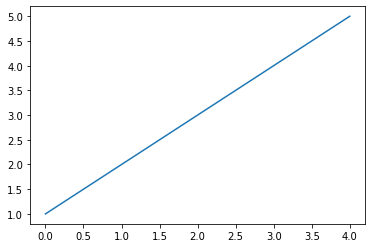

In [4]:
x = [1,2,3,4,5]
plt.plot(x);

Question mark after a function will open pager with documentation. Double question mark will show you source code of the function.

In [ ]:
## uncomment to see the 'full' help menu, which is a lot of output
#plt.plot??

#### Formatting text

Double click on this cell to reveal the unformatted text which can then be re-executed, either from the buttons provided or by holding down shift while you press enter

As you can see below, formatting text characters apply to markdown cells

Emphasis, aka italics, with *asterisks* or _underscores_.

Strong emphasis, aka bold, with **asterisks** or __underscores__.

Combined emphasis with **asterisks and _underscores_**.

Strikethrough uses two tildes. ~~Scratch this.~~

[I'm an inline-style link](https://www.google.com)

We can write equations inline: $e = mc^2$, $e^{i\pi}+1=0$

or in display format:

$$ e^x = \sum_{i=0}^{\infty}\frac{1}{i!}x^i$$

In [5]:
from IPython.display import Image
Image(url='http://python.org/images/python-logo.gif')

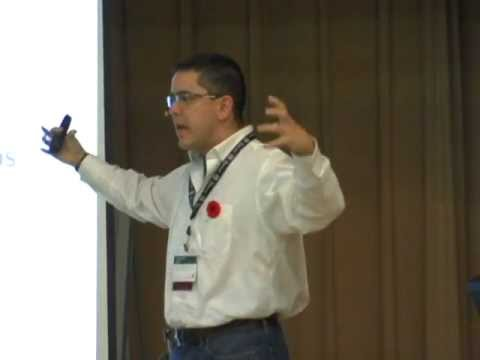

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('F4rFuIb1Ie4')

Find out how long it take to run a command with %timeit magic function:

In [7]:
%timeit -n 12 list(range(1000000))

42.6 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 12 loops each)


Print all interactive variables:

In [ ]:
%whos

In order to get information about all magic functions type:

In [8]:
## uncomment if you are interested in all the magic commands, 
## but it isn't necessary to read it to execute the rest of the notebook
#%magic

You can navigate and list file contents in python using the ```os``` module

In [9]:
import os
print(os.getcwd())

C:\Users\lpraznik\Desktop\buscombe-sat-img-classification


There are a couple of different ways of running a python script and passing it variables. To demonstrate this, let's first make a simple script that accepts 2 variables and prints them to screen 

In [12]:
var1 = 50
var2 = 'jupyter_is_cool'

```writefile``` is a so-called [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

In [13]:
%%writefile test_script.py
import sys
script, var1, var2 = sys.argv
print("Script name:", script)
print("First variable:", var1)
print("Second variable:", var2)

Overwriting test_script.py


You can run the script using the ```run``` jupyter magic command. Variables are passed to the script using a $ symbol

In [14]:
%run ./test_script.py $var1 $var2

Script name: ./test_script.py
First variable: 50
Second variable: jupyter_is_cool


... or using the bang operator. This is the convention we'll adopt in this clinic:

In [ ]:
! python test_script.py $var1 $var2

#### File management and resources on linux

(these commands below only work in the cloud environment, unless you are in an environment supporting bash. Uncomment to run)

How much memory do you have?

In [15]:
#!cat /proc/meminfo | head

'cat' is not recognized as an internal or external command,
operable program or batch file.


CPUs?

In [ ]:
#!cat /proc/cpuinfo | grep processor

Storage space?

In [ ]:
#! df -h | grep "/"

<table style="font-size: 1em; padding: 0; margin: 0;">

<h1 style="width: 100%; text-align: left; padding: 0px 25px;"><small style="color: #182AEB;">
    </small><br/>Getting started with<br/> Tensorflow 2 and Keras</h1>  
<br/>
<p style="border-left: 15px solid #182AEB; text-align:justify; padding: 0 10px;">
    <strong style="color: #182AEB;">Intro.</strong> 
TensorFlow is a way of representing computation without actually performing it until asked. In this sense, it is a form of lazy computing, and it allows for some great improvements to the running of code:
<ul>
  <li>Faster computation of complex variables</li>
  <li>Distributed computation across multiple systems, including GPUs.</li>
  <li>Reduced redundency in some computations</li>
</ul>
</p>
<p style="border-left: 15px solid #6019D6; padding: 0 10px; text-align:justify;">
    <strong style="color: #6019D6;">Tip.</strong> 
TensorFlow allows you to create dataflow graphs. These are structures that describe how data moves through a graph, or a series of processing nodes. Each node in the graph represents a mathematical operation, and each connection or edge between nodes is a multidimensional data array, or tensor. Keras is a set of layers that describes how to build neural networks using a clear standard. The Sequential API defines a Neural Network as a stack of layers. It very easy to define a model and to add new layers</p>

<p style="border-left: 15px solid #4E9317; padding: 0 10px; text-align:justify;">
    <strong style="color: #4E9317;">More Resources.</strong> 
<ul>
  <li><a href="https://www.tensorflow.org/tutorials">Getting Started with Tensorflow</a></li>    
  <li><a href="https://github.com/sarangzambare/segmentation">Segmentation of cells using CNNs and TF-2</a></li>
  <li><a href="https://github.com/tensorflow/models/tree/master/research/deeplab">Segmentation Segmentation using DeepLab</a></li>
</ul></p>
        </tr>
        </table>

Next we're going to import the ```tensorflow``` module and print the version number. At the time of writing, the version number is ```2.0.0```. Be aware that it is possible this code could break with other (later/earlier) versions of tensorflow

In [4]:
import tensorflow as tf
tf.__version__

'2.1.0'

You can test to see if a GPU is available like so:

In [5]:
tf.test.is_gpu_available()

False

#### Keras

A good way to get oriented with keras is to read the [summary documentation](https://keras.io/), but note that in this project you are recommended to use the version of keras within tensorflow, so the [tf.keras documentation](https://www.tensorflow.org/guide/keras) is also very relevant. Also, [this blog post](https://towardsdatascience.com/tensorflow-is-in-a-relationship-with-keras-introducing-tf-2-0-dcf1228f73ae) is worth a read, as is [this other blog post](https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/)


#### Two ways to make a model

We're going to familiarize ourselves with tensorflow and keras using a relevant example, involving image classification. Instead of our project task involving semantic segmentation (classification of every pixel), computer scientists tend to refer to classification of whole images as 'image classification'.

```keras``` is accessed as ```tf.keras``` and its layers can be imported separately

In [6]:
# Tensorflow keras layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, BatchNormalization

In the above, we have imported 2 different types of layers (`Dense`, `Dropout`), and `Flatten` that isn't technically a layer but is classified as one because it transforms a layer's dimensions (specifically, it turns a 2D matrix into a 1D vector). We will encounter and discuss further the various layers in more depth in subsequent Parts, but `Dense` is a densely connected layer where each neuron of the previous layer connects to each neuron in the previous layer. `Dropout` is one of several strategies for preventing model overfitting. It randomly drops a certain proportion of neurons, to prevent the model 'memorizing' the data and promote model generalization

This a simple neural network model with one hidden layer that receives a 28 x 28 pixel image, and outputs one of 10 values. It has one hidden layer with 128 neurons and a rectified linear unit (```relu```) activation function. Between the hidden layer and output (classifying) layer there is a dropout layer where 20 % of neurons are randomly discarded. Softmax is an activation function. See [here](https://towardsdatascience.com/softmax-function-simplified-714068bf8156) for a good explanation. See [here](https://keras.io/activations/) for alternatives. It might be a good idea to play with different activation functions to explore their utility and effects

In [7]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

Above we introduce the `Sequential` model. You should take some time to explore is numerous useful properties, such as 

1. `.summary()`, which shows the model architecture

2. `.layers`, which lists the layers of the model and their shapes

3. `.save()` saves the model in its current state of training, so you can keep a record of the state of the model at various points through training. Models can be recovered from a file using `tensorflow.keras.models.load_model()`

4. `.save_weights()` saves only the weights of the model to a file

5. `.inputs` and `.outputs` provide access to model inputs and outputs

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


That's the same as 

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

You can verify by comparing the two model summaries

In [14]:
model.outputs

[<tf.Tensor 'dense_3/Identity:0' shape=(None, 10) dtype=float32>]

#### Working with imagery

We'll use our model to classify imagery. Load the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), split into test and training sets, and convert the samples from integers to floating-point numbers.

The imagery data contained in the variables `x_test` and `x_train` are divided by 255.0 to normalize their values, such that all pixels have values that vary between 0 and 1, instead of 0 and 255 which is the the range of values for a standard 8-bit image

In [15]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 2s 0us/step


In [16]:
import numpy as np

# check some statistics
IMAGE_HEIGHT, IMAGE_WIDTH = x_train.shape[1:3]
print("# of train examples:", x_train.shape[0])
print("# of test examples:", x_test.shape[0])
print("Image shape:", x_train[0].shape)
print("Pixel value interval:", np.min(x_train), np.max(x_train))
print("Train shape:",x_train.shape)
print("Test shape:",x_test.shape)
print("Image height:",IMAGE_HEIGHT)
print("Image width:",IMAGE_WIDTH)

# of train examples: 60000
# of test examples: 10000
Image shape: (28, 28)
Pixel value interval: 0.0 1.0
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Image height: 28
Image width: 28


Take a look at some examples. Please remember that code such as this is provided as a succinct example workflow, but it is possible to develop similar 'solutions' on your own

In [17]:
import matplotlib.pyplot as plt

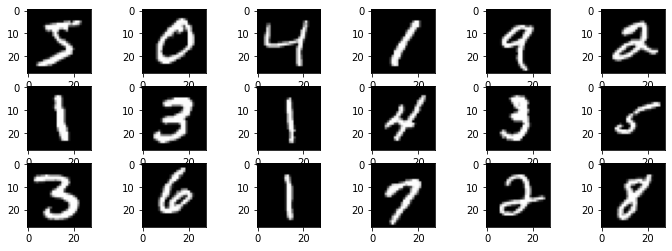

In [18]:
%matplotlib inline
# visualize some of the examples
fig, axs = plt.subplots(nrows=3, ncols=6, constrained_layout=False, figsize=(12,4))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap="gray")

Tensorboard is a tool for visualizing model training, such as how the loss function decreased, or accuracy increased, as a function of training epoch. Its use is often an essential part of optimizing model training

In [19]:
from tensorflow.python.keras.callbacks import TensorBoard

In [20]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%reload_ext tensorboard

# create the tensorboard callback
tensorboard = TensorBoard(log_dir='logs', histogram_freq=1)

Calling `.compile()` is a required step before model training. The following must be specified:

1. `optimizer` that performs the gradient descent (numerical solver)

2. `loss` that is the metric to be optimized. Below we choose `sparse_categorical_crossentropy` because we have a categorical problem (hence `categorical_crossentropy`) that is not [one-hot-encoded](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) (hence `sparse`)

3. `metrics`, which are additional metrics to evaluate during training  but, unlike loss, are not used in the training process

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train and evaluate the model:

In [22]:
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3014 - accuracy: 0.9124
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1453 - accuracy: 0.9572
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1090 - accuracy: 0.9662
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0901 - accuracy: 0.9719
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0761 - accuracy: 0.9752


Launch tensorboard for visualizing model training. You should see graphs `epoch_accuracy` and `epoch_loss` that show accuracy and loss function value, respectively, as a function of training epoch

In [24]:
# launch TensorBoard from Jupyter
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 9900), started 0:01:31 ago. (Use '!kill 9900' to kill it.)

Use the built-in ```evaluate``` function to see overall classification loss (first number) and accuracy (second number)

In [25]:
model.evaluate(x_test, y_test, verbose=0)

[0.07666455198093318, 0.9744]

The image classifier is now trained to ~98% accuracy on this dataset. 

#### Plot the Confusion Matrix
A ‘confusion matrix’, which is the matrix of normalized correspondences between true and estimated labels, is a convenient way to visualize model skill. 

A perfect correspondence between true and estimated labels is scored 1.0 along the diagonal elements of the matrix.

Misclassiﬁcations are readily identiﬁed as off-diagonal elements. Systematic misclassiﬁcations are recognized as off-diagonal elements with large magnitudes. 

In [26]:
from sklearn.metrics import confusion_matrix

The function below is long and might be difficult to follow in parts. This is a good time to remind you that that's ok; you will see this function again, and it isn't crucial to any workflow you will develop. It serves only to exemplify and guide, and many the details of many of the long functions such as these are largely unimportant

In [27]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Use the built-in ```predict``` function to create a vector of predicted classes for each input in the ```x_test``` set. These values are one-hot encoded, which means we recover the most likely class using the ```argmax``` function (i.e. the location in the vector, ```predictions```, of the maximum value)

In [28]:
# Test your model using the test data
predictions = model.predict(x_test)
predictions = tf.argmax(predictions, axis=1)

Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

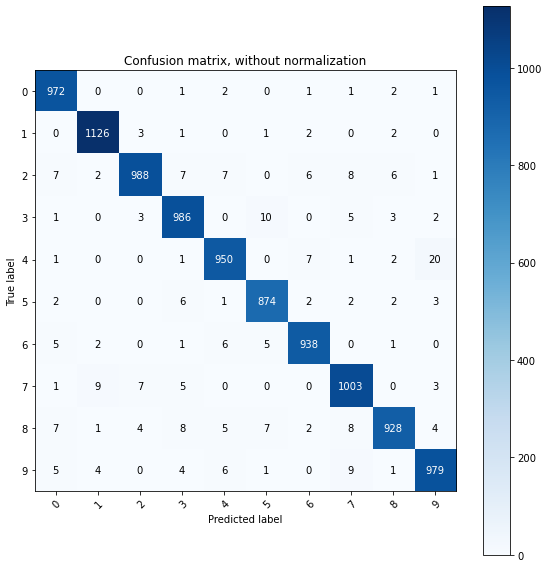

In [29]:
# check the confusion matrix
classes=['0','1','2','3','4','5','6','7','8','9']

plot_confusion_matrix(y_test, predictions, classes)

The above demonstration shows that for relatively simple classification tasks (i.e. recognizing handwritten digits) doesn't necessarily require deep learning. Our network was small, consisting of only one hidden layer. In the next task we will be using much bigger, more powerful networks.

<table style="font-size: 1em; padding: 0; margin: 0;">
<p style="border: 1px solid #ff5733; border-left: 15px solid #ff5733; padding: 10px; text-align:justify;">
    <strong style="color: #ff5733">Deliverable</strong>  
    <br/>The deliverable for Part 1 is a jupyter notebook showing an example image(s) of a satellite dataset read in using rasterio, and demonstration of a function that carries out a manipulation of that image using keras and Tensorflow 2.0. That manipulation could be anything that alters the image, such as its size, geometry (shape), pixel intensities, or spatial projection. This will mostly test your understanding of keras syntax, which is an essential component of the remaining Parts. You may find the <a href="https://www.tensorflow.org/api_docs/python/tf/image">tensorflow-image</a> library helpful.
    </p>

<table style="font-size: 1em; padding: 0; margin: 0;">

<h1 style="width: 100%; text-align: left; padding: 0px 25px;"><small style="color: #182AEB;">
    </small><br/>Going further: <br/> Introduction to satellite imagery</h1>  
<br/>
<p style="border-left: 15px solid #182AEB; text-align:justify; padding: 0 10px;">
    <strong style="color: #182AEB;">Intro.</strong>
    The <a href="https://sentinels.copernicus.eu/">Sentinel satellites</a> are part of Europe’s <a href="http://copernicus.eu/">Copernicus </a> programme (formerly known as Global Monitoring for Environment and Security (GMES)). The overall mission is composed of five constellations of satellites. The Sentinel-2 mission consists of two satellites with a multi-spectral instrument for monitoring agriculture, vegetation and forests, land cover change, coastal zones, inland water monitoring, glaciers, ice extent and snow cover.
</p>
<p style="border-left: 15px solid #6019D6; padding: 0 10px; text-align:justify;">
    <strong style="color: #6019D6;">Tip.</strong> 
    A comprehensive introduction to the mission and its data can be found <a href="https://eox.at/2015/12/understanding-sentinel-2-satellite-data/"> here</a>. Your starting point for all data services is <a href="https://www.sentinel-hub.com/sentinel-2">Sentinel Hub </a></p>

<p style="border-left: 15px solid #4E9317; padding: 0 10px; text-align:justify;">
    <strong style="color: #4E9317;">More Resources.</strong> 
<ul>
  <li><a href="https://krstn.eu/download-Sentinel-2-images/">Another guide to using sentinselsat</a></li>    
  <li><a href="https://automating-gis-processes.github.io/CSC18/lessons/L6/raster-mosaic.html">Using rasterio</a></li>
</ul>
        </tr>
        </table>

#### Importing a satellite image using rasterio

In [3]:
import rasterio
import glob
import os

##### Download a sample Sentinel-2 JP2 (JPEG2000) file from google drive

The details of this function are unimportant

In [4]:
# from https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [5]:
file_id = '1o76QoBtn6ExxO8KgcCqdOiun_KsWoMJl'
destination = 'example_TCI_10m.jp2'
download_file_from_google_drive(file_id, destination)

Read first band of the jp2 file into an array

In [6]:
with rasterio.open('example_TCI_10m.jp2', driver='JP2OpenJPEG') as dataset:
    array = dataset.read(1)
    print(dataset.profile)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32719), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 8000020.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True, 'interleave': 'pixel'}


count = 3 means there are three bands in the raster:

* Band 1 - the blue band
* Band 2 - the green band
* Band 3 - the red band

A few more jp2 images can be downloaded using the following file id: 1o76QoBtn6ExxO8KgcCqdOiun_KsWoMJl. This is a zipped folder 120 MB in size containing several images of the area around Lake Poopó, Bolivia

#### Writing a satellite image to geotiff using rasterio

The following function takes a JP2 image, an output file name (with tiff extension) and a single band number (1, 2, or 3) and writes the raster to the new file

In [7]:
def write_image(input, output, band):
    with rasterio.open(input) as src_dataset:
        with rasterio.open('example_TCI_10m.jp2', driver='JP2OpenJPEG') as dataset:
            array = dataset.read(band)
        # Get a copy of the source dataset's profile. Thus our
        # destination dataset will have the same dimensions,
        # number of bands, data type, and georeferencing as the
        # source dataset.
        kwds = src_dataset.profile

        # Change the format driver for the destination dataset to
        # 'GTiff', short for GeoTIFF.
        kwds['driver'] = 'GTiff'

        # Add GeoTIFF-specific keyword arguments.
        kwds['tiled'] = True
        kwds['blockxsize'] = 256
        kwds['blockysize'] = 256
        kwds['photometric'] = 'YCbCr'
        kwds['compress'] = 'JPEG'

        with rasterio.open(output, 'w', **kwds) as dst_dataset:
            # Write data to the destination dataset.
            dst_dataset.write(array.astype(rasterio.uint8), 1)

Here is the list of files we will create, each with a 1-band raster

In [8]:
file_list = ['r1.tif', 'r2.tif', 'r3.tif']

We use list comprehension to call the ```write_image``` function for all 3 bands in turn

In [9]:
[write_image('example_TCI_10m.jp2',f, band) for f,band in zip(file_list, [1,2,3])]

[None, None, None]

This next bit of code gets the meta data from the first file (that is the same as the remaining two files), and writes a merged 3-band raster in geoTIFF format

In [10]:
# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list))

# Read each layer and write it to stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

We're now done with the three intermediate files, so we can delete them to save space

In [11]:
[os.remove(f) for f in file_list]

[None, None, None]

Display the new meta data that shows the Coordinate Reference System or CRS. The EPSG code is 32719

In [12]:
meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 3,
 'crs': CRS.from_epsg(32719),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 8000020.0)}

#### Image spatial projections

Next we're going to reproject our raster so it is in a different spatial projection. This involves specifying a new CRS (this time we use EPSG code 4326)

Example modified from https://rasterio.readthedocs.io/en/stable/topics/reproject.html

First we import some utility functions from rasterio that will create and apply the transformation. Again we use a nested 'with statement' to first read in the raster to be projected (```stack.tif```) and then write out the reprojected raster (```reprojected_stack.tif```)

In [13]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'

# note there is a nested 'with statement' here
# the first 'with' command opens the image as src
with rasterio.open('stack.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
# the second 'with' statement opens an image for writing
    with rasterio.open('reprojected_stack.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)